In [23]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
import math

In [24]:
# Load the breast cancer dataset
data = load_breast_cancer()

In [25]:
# split dataset into target and features
X = data.data
y = data.target

In [27]:
_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# create classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# make predictions
y_pred = rf_classifier.predict(X_test)

In [31]:
acc = accuracy_score(y_test, y_pred)
preci = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [32]:
print("Accuracy:", acc)
print("Precision:", preci)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222


In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [34]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

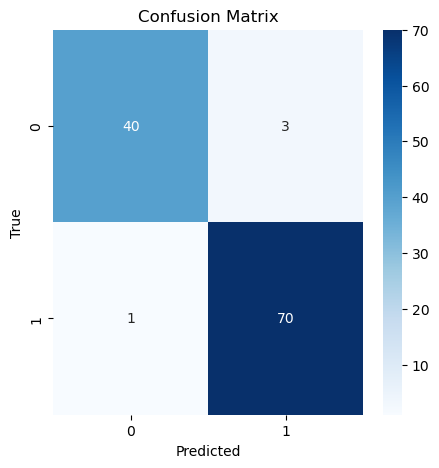

In [36]:
# Display the confusion matrix using a heatmap (seaborn)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

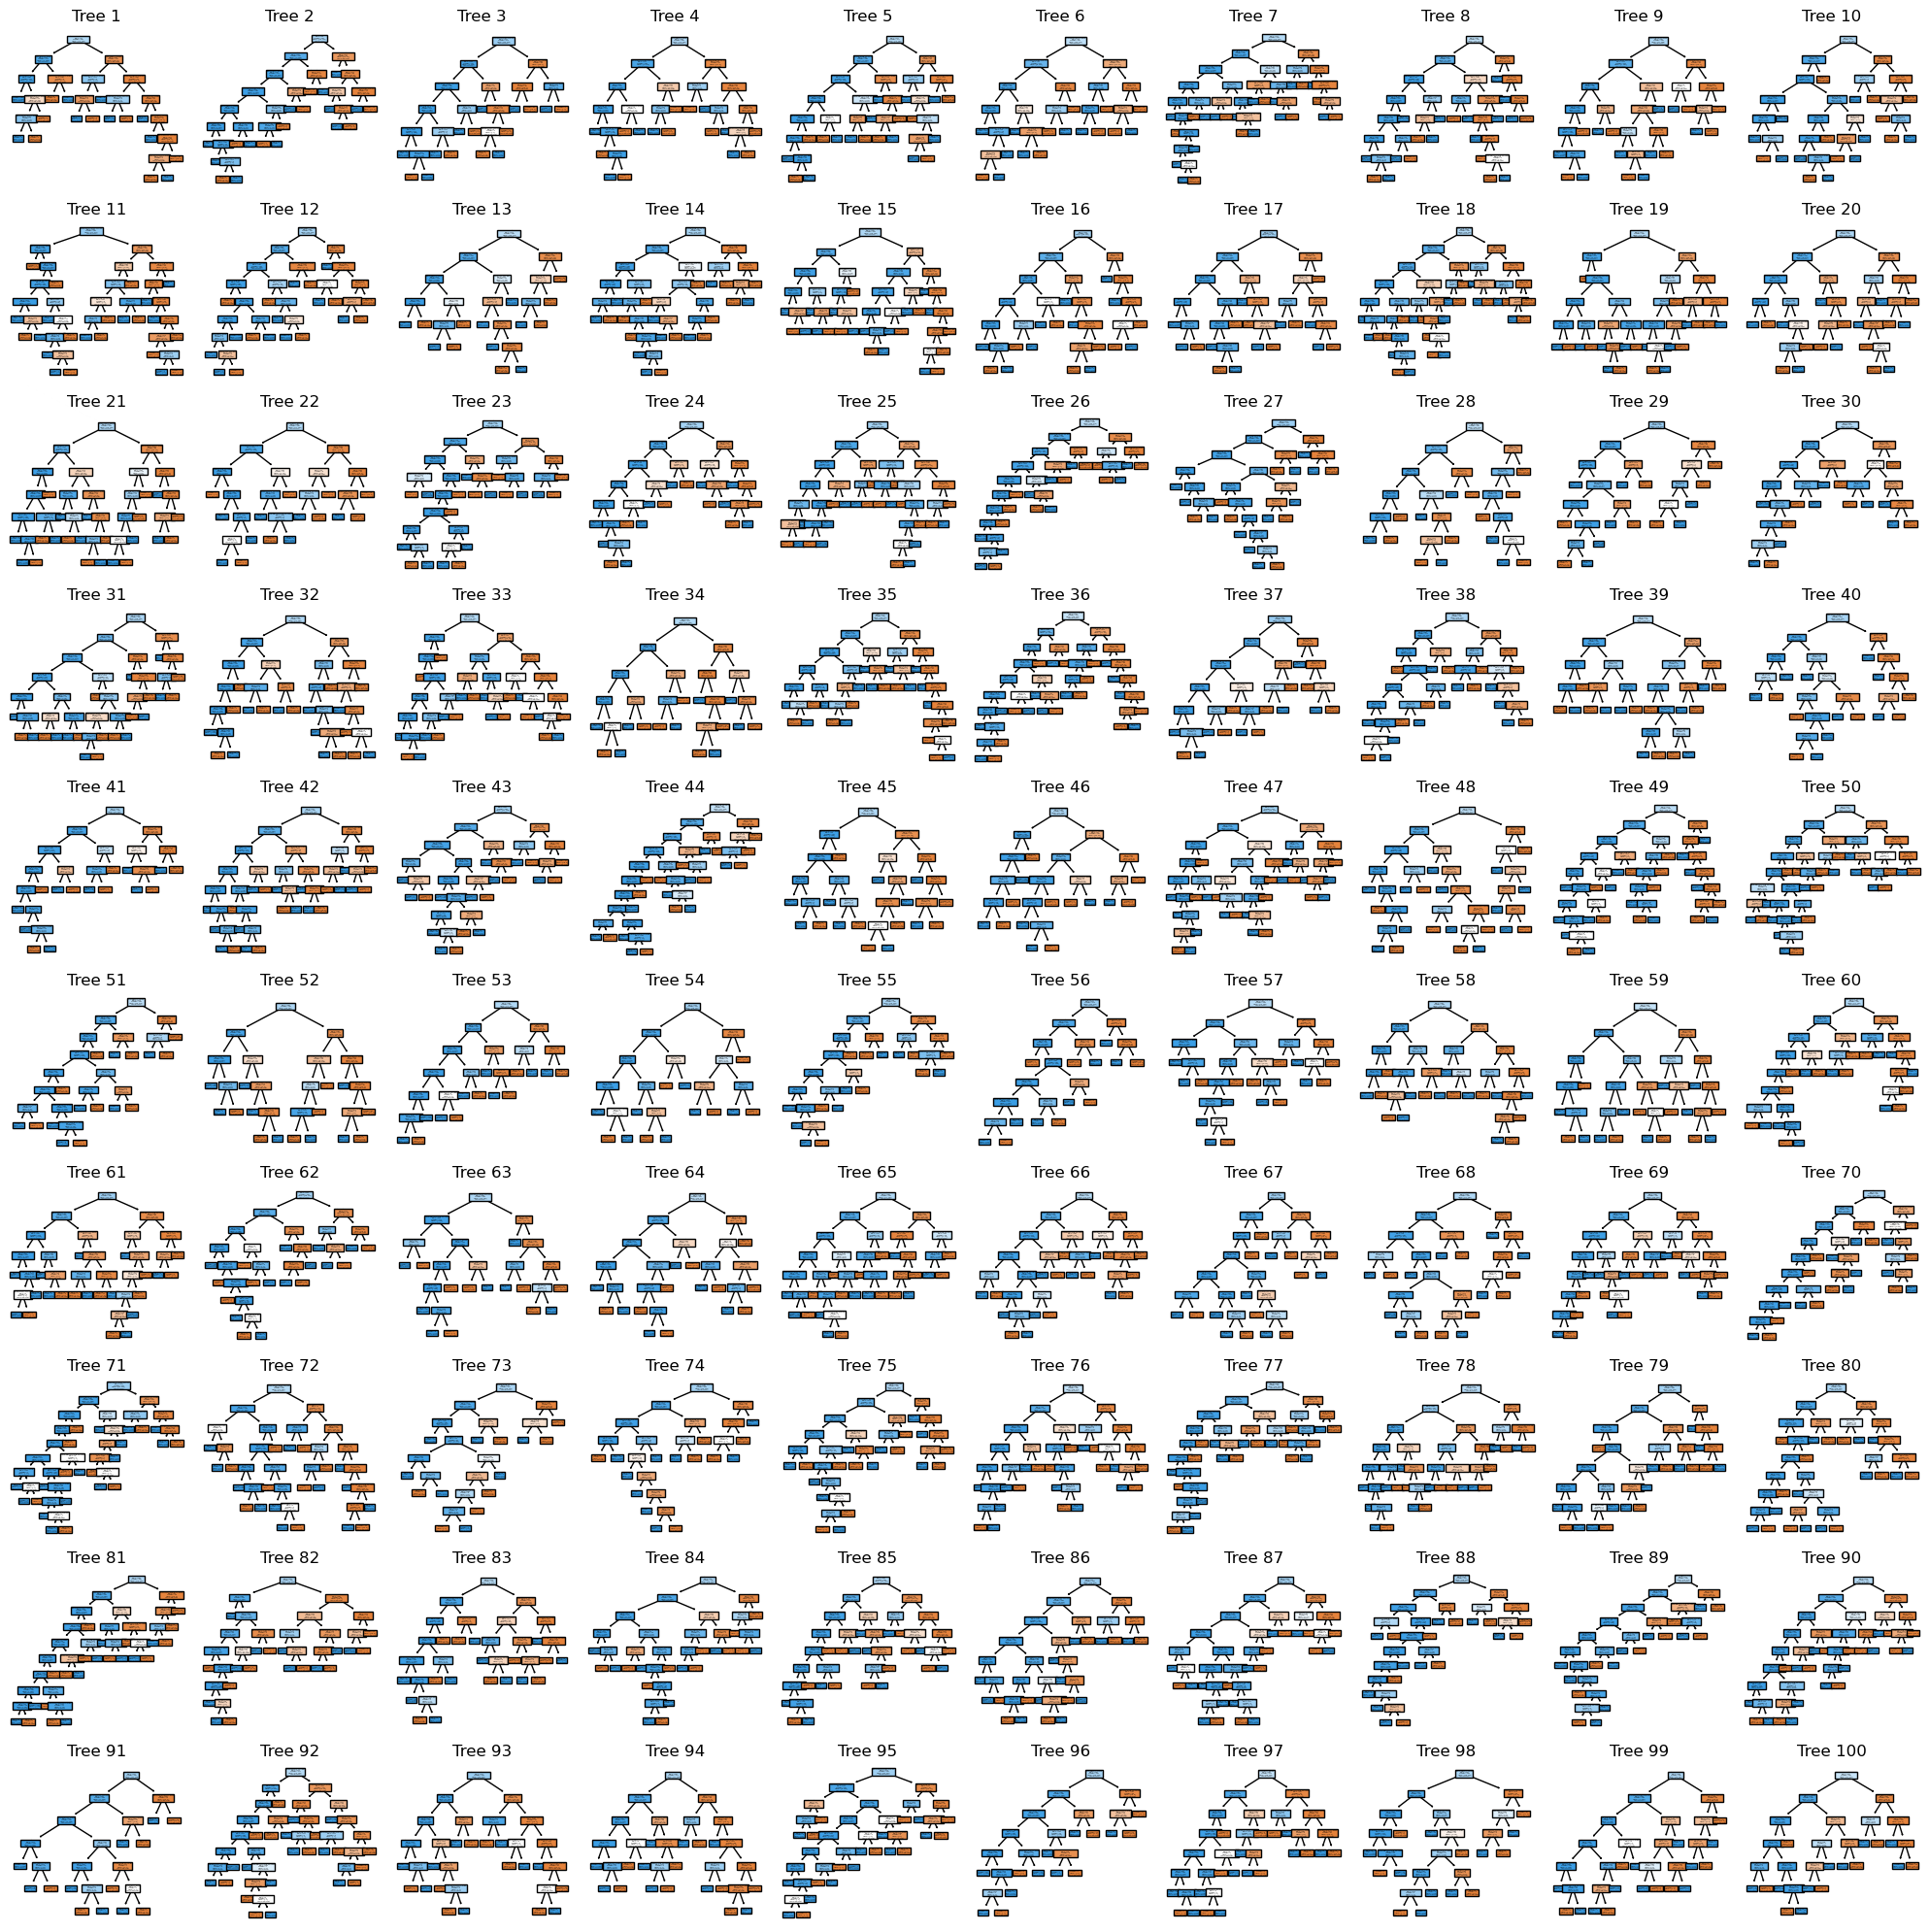

In [37]:
# Display 100 d- tree for random forest
plt.figure(figsize=(20, 20))
num_trees = len(rf_classifier.estimators_)
rows = math.ceil(math.sqrt(num_trees))
cols = math.ceil(num_trees / rows)
for i, tree in enumerate(rf_classifier.estimators_):
    plt.subplot(rows, cols, i + 1)
    plot_tree(tree, filled=True, feature_names=data.feature_names.tolist(), class_names=data.target_names.tolist())
    plt.title(f"Tree {i + 1}")
plt.tight_layout()
plt.show()